# Análisis Exploratorio de Datos para predecir ictus en personas

In [480]:
import numpy as np
import pandas as pd 

In [481]:
df = pd.read_csv('stroke_dataset.csv')

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [483]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


Importamos el nuevo dataset con más datos.

In [484]:
extra_df = pd.read_csv('extra_dataset.csv')

extra_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [485]:
extra_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [486]:
extra_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


Como vemos, el nuevo dataset tiene la columna "id" que nuestro dataset inicial no tiene, por lo que decidimos eliminarla para tener las mismas columnas que el dataset inicial.

In [487]:
extra_df.drop(columns=["id"], inplace=True)

In [488]:
duplicates = df.duplicated()
print(f"Número de filas duplicadas en el dataset inicial: {duplicates.sum()}")

Número de filas duplicadas en el dataset inicial: 0


In [489]:
duplicates = extra_df.duplicated()
print(f"Número de filas duplicadas en el nuevo dataset: {duplicates.sum()}")

Número de filas duplicadas en el nuevo dataset: 0


Juntamos los 2 datasets.

In [490]:
total_df = pd.concat([df, extra_df], ignore_index=True)

In [491]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48381 entries, 0 to 48380
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             48381 non-null  object 
 1   age                48381 non-null  float64
 2   hypertension       48381 non-null  int64  
 3   heart_disease      48381 non-null  int64  
 4   ever_married       48381 non-null  object 
 5   work_type          48381 non-null  object 
 6   Residence_type     48381 non-null  object 
 7   avg_glucose_level  48381 non-null  float64
 8   bmi                46919 non-null  float64
 9   smoking_status     35089 non-null  object 
 10  stroke             48381 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 4.1+ MB


Ahora que tenemos los 2 dataset concatenados, pasamos a realizar el nuevo análisis y buscar si a parte de que ahora el dataset es más grande, buscamos si hay diferentes variables en las columnas o si necesitamos normalizarlos.

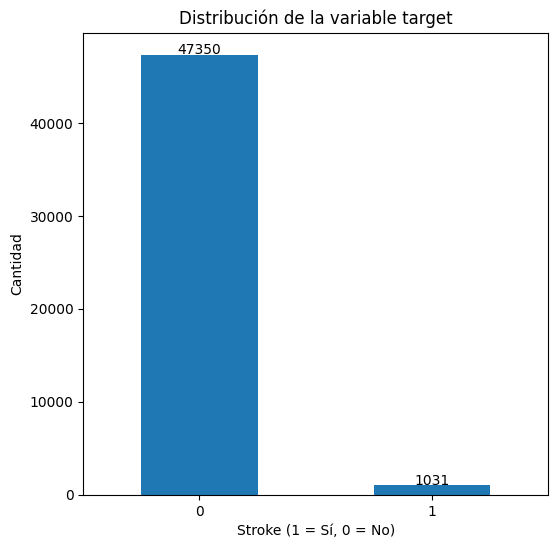

In [492]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = total_df['stroke'].value_counts().sort_index()

plt.figure(figsize=(6, 6))  # ancho=6, alto=4


ax = counts.plot(kind='bar')
plt.title('Distribución de la variable target')
plt.xlabel('Stroke (1 = Sí, 0 = No)')
plt.ylabel('Cantidad')

plt.xticks(rotation=0)

for i, v in enumerate(counts):
    ax.text(i, v + 50, str(v), ha='center', fontsize=10)

plt.show()

Vemos que el dataset está bastante desbalanceado: (total 48381)

- No ictus: 1031 (2.13%)

- Ictus: 47350 (97,87%)

In [493]:
for col in total_df.columns:
    print(f"Columna: {col}")
    print(f"Valores únicos: {total_df[col].nunique()}")
    print("-------")

Columna: gender
Valores únicos: 3
-------
Columna: age
Valores únicos: 104
-------
Columna: hypertension
Valores únicos: 2
-------
Columna: heart_disease
Valores únicos: 2
-------
Columna: ever_married
Valores únicos: 2
-------
Columna: work_type
Valores únicos: 5
-------
Columna: Residence_type
Valores únicos: 2
-------
Columna: avg_glucose_level
Valores únicos: 12543
-------
Columna: bmi
Valores únicos: 555
-------
Columna: smoking_status
Valores únicos: 4
-------
Columna: stroke
Valores únicos: 2
-------


In [494]:
discarded_columns = ["age", "avg_glucose_level", "bmi"]

for col in total_df.columns:
    if col not in discarded_columns:
        print(f"Columna: {col}")
        print(f"Valores únicos: {total_df[col].unique()}")
        print("-------")

Columna: gender
Valores únicos: ['Male' 'Female' 'Other']
-------
Columna: hypertension
Valores únicos: [0 1]
-------
Columna: heart_disease
Valores únicos: [1 0]
-------
Columna: ever_married
Valores únicos: ['Yes' 'No']
-------
Columna: work_type
Valores únicos: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
-------
Columna: Residence_type
Valores únicos: ['Urban' 'Rural']
-------
Columna: smoking_status
Valores únicos: ['formerly smoked' 'never smoked' 'smokes' 'Unknown' nan]
-------
Columna: stroke
Valores únicos: [1 0]
-------


In [495]:
unknwon_count = (total_df['smoking_status'] == "Unknown").sum()
print(f"Número de filas con 'smoking_status' como 'Unknown': {unknwon_count}")

Número de filas con 'smoking_status' como 'Unknown': 1500


Vemos que en la columna "smoking_status" ahora hay variables NaN, por lo que decidimos rellenarlos con "Unknown".

In [496]:
total_df.fillna({"smoking_status": "Unknown"}, inplace=True)

Además ahora en la columna "gender" tenemos una nueva variables "Other".

## Normalización y transformación de los datos

- "gender": convertir de objeto a binario
- "ever_married": convertir de objeto a binario
- "work_type": convertir de objeto a binario
- "Residence_type": convertir de objeto a binario
- "smoking_status": convertir de objeto a binario

In [497]:
# lista de columnas categóricas a convertir
multiclass_columns = ["work_type", "smoking_status", "gender"]

# usamos get_dummies para convertir las columnas categóricas en variables dummy
total_df = pd.get_dummies(total_df, columns=multiclass_columns)

# aseguramos que los dummies están como enteros (0/1)
dummy_cols = [col for col in total_df.columns if any(prefix in col for prefix in multiclass_columns)]
total_df[dummy_cols] = total_df[dummy_cols].astype(int)

In [498]:
binary_columns = ["ever_married", "Residence_type"]
mapping_dict = {
    "ever_married": {"Yes": 1, "No": 0},
    "Residence_type": {"Urban": 1, "Rural": 0}
}

for col in binary_columns:
    total_df[col] = total_df[col].map(mapping_dict[col])

In [500]:
total_df.isna().sum()

age                                  0
hypertension                         0
heart_disease                        0
ever_married                         0
Residence_type                       0
avg_glucose_level                    0
bmi                               1462
stroke                               0
work_type_Govt_job                   0
work_type_Never_worked               0
work_type_Private                    0
work_type_Self-employed              0
work_type_children                   0
smoking_status_Unknown               0
smoking_status_formerly smoked       0
smoking_status_never smoked          0
smoking_status_smokes                0
gender_Female                        0
gender_Male                          0
gender_Other                         0
dtype: int64

In [499]:
total_df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other
0,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0,0,1,0
1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0,0,1,0
2,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1,1,0,0
3,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0,1,0,0
4,81.0,0,0,1,1,186.21,29.0,1,0,0,1,0,0,0,1,0,0,0,1,0
